# SARSA & Q Learning Algorithms

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import random
from pandas import DataFrame
from random import random
import abdulgym 
from SARSA import SARSAagent
from Qlearn import Qlagent


epsilon= 0.1
alpha= 0.1
gamma= .90
ep_len= 100
ep_num= 10000
meta=[epsilon,alpha,gamma,ep_len, ep_num]

In [2]:
env=abdulgym.make('AAgridworld-v0')
envh=abdulgym.make('AAgridworld-v0')
Qs,  rewardS,a,s,r_s=SARSAagent(meta,env)
Qsh, rewardSh,_,_,_=SARSAagent(meta,envh,hard=True)

In [3]:
env=abdulgym.make('AAgridworld-v0')
envh=abdulgym.make('AAgridworld-v0')
Qq,  rewardQ,_,_ =Qlagent(meta,env)
Qqh, rewardQh,_,_ =Qlagent(meta,envh,hard=True)

In [4]:
gaS=[] #greedy action for sarsa
gaSH=[] #greedy action for hard sarsa
gaQ=[] # "" for Qlearning
gaQH=[] #"" "" hard

for i in range(25):
    gaS.append(np.argmax(Qs[:,i]))
    gaSH.append(np.argmax(Qsh[:,i]))
    gaQ.append(np.argmax(Qq[:,i]))
    gaQH.append(np.argmax(Qqh[:,i]))

In [5]:
soutput=25*['']
qoutput=25*['']
sHoutput=25*['']
qHoutput=25*['']


for i in range(len(gaS)):
    if gaS[i]==0:
        soutput[i]='>'
    elif gaS[i]==1:
        soutput[i]='<'
    elif gaS[i]==2:
        soutput[i]='^'
    else:
        soutput[i]='v'
    
    if gaSH[i]==0:
        sHoutput[i]='>'
    elif gaSH[i]==1:
        sHoutput[i]='<'
    elif gaSH[i]==2:
        sHoutput[i]='^'
    else:
        sHoutput[i]='v'
    
    if gaQ[i]==0:
        qoutput[i]='>'
    elif gaQ[i]==1:
        qoutput[i]='<'
    elif gaQ[i]==2:
        qoutput[i]='^'
    else:
        qoutput[i]='v'
    
    if gaQH[i]==0:
        qHoutput[i]='>'
    elif gaQH[i]==1:
        qHoutput[i]='<'
    elif gaQH[i]==2:
        qHoutput[i]='^'
    else:
        qHoutput[i]='v'

print('  SARSA Easy')
print('',*soutput[20:25],'\n',*soutput[15:20],'\n',*soutput[10:15],'\n',*soutput[5:10],'\n',*soutput[0:5],'\n')        
print('  SARSA Hard')
print('',*sHoutput[20:25],'\n',*sHoutput[15:20],'\n',*sHoutput[10:15],'\n',*sHoutput[5:10],'\n',*sHoutput[0:5],'\n')        
print('  Qlearn Easy')
print('',*qoutput[20:25],'\n',*qoutput[15:20],'\n',*qoutput[10:15],'\n',*qoutput[5:10],'\n',*qoutput[0:5],'\n')        
print('  Qlearn Hard')
print('',*qHoutput[20:25],'\n',*qHoutput[15:20],'\n',*qHoutput[10:15],'\n',*qHoutput[5:10],'\n',*qHoutput[0:5],'\n')        
# 0 right 1 left 2 up 3 down


  SARSA Easy
 > ^ < > < 
 > ^ < ^ < 
 > ^ < < ^ 
 ^ ^ ^ < < 
 ^ ^ ^ < ^ 

  SARSA Hard
 > v < > < 
 ^ ^ < < ^ 
 > ^ ^ < ^ 
 ^ ^ < < ^ 
 > ^ ^ ^ ^ 

  Qlearn Easy
 > > < > < 
 > ^ < < < 
 > ^ ^ < < 
 > ^ ^ ^ ^ 
 > ^ ^ > ^ 

  Qlearn Hard
 > < < v < 
 > ^ < < < 
 ^ ^ ^ ^ < 
 > ^ ^ ^ ^ 
 ^ ^ ^ < ^ 



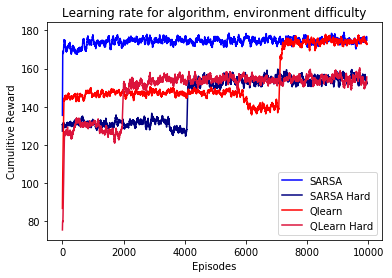

In [6]:
#plt.plot(rewardS)
N=50
plt.plot(np.convolve(rewardS, np.ones((N,))/N, mode='valid'),'b')
plt.plot(np.convolve(rewardSh, np.ones((N,))/N, mode='valid'),'navy')
plt.plot(np.convolve(rewardQ, np.ones((N,))/N, mode='valid'),'r')
plt.plot(np.convolve(rewardQh, np.ones((N,))/N, mode='valid'),'crimson')
plt.xlabel('Episodes')
plt.title('Learning rate for algorithm, environment difficulty')
plt.ylabel('Cumulitive Reward')
plt.legend(['SARSA','SARSA Hard','Qlearn','QLearn Hard'])
plt.show()

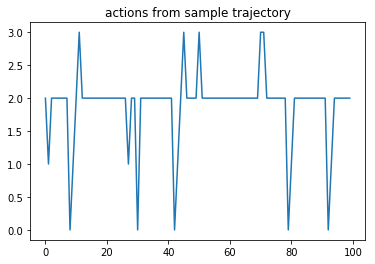

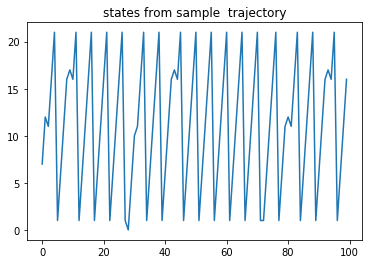

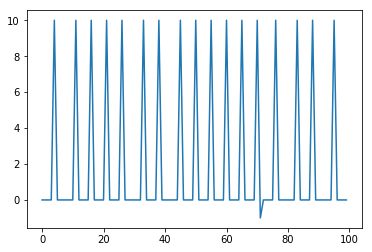

In [7]:
plt.title('actions from sample trajectory')
plt.title
plt.plot(a)
plt.show()
plt.title('states from sample  trajectory')
plt.plot(s)
plt.show()
plt.plot(r_s)


%qtconsole